# Predict the percentage of a student on the basis of the study hours

## Data Preprocessing

### Importing the necessary Libraies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

### Importing the dataset and observing it

In [2]:
ds = pd.read_csv("study.csv")
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
ds.shape

(25, 2)

The above dataset contains 2 attributes and 25 rows with 0 Null values.

In [3]:
ds.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Visualizing The data

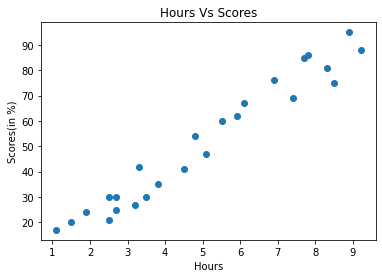

In [7]:
plt.scatter(ds['Hours'], ds['Scores'])
plt.title("Hours Vs Scores")
plt.xlabel('Hours')
plt.ylabel('Scores(in %)');

There may be a presence of linear relationship in the data.

### dividing the data into Feature vector anf Dependent Variable vector

In [11]:
x = ds.iloc[:,:-1].values
y = ds.iloc[:,-1].values

In [16]:
x_train[:6,:]

array([[2.7],
       [3.3],
       [5.1],
       [3.8],
       [1.5],
       [3.2]])

In [13]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### Replacing the Missing Data

There are no null valuyes orof Missing data. So this step can be skipped.

### Splitting the trang and testing dataset

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [17]:
x_train[:6,:]

array([[2.7],
       [3.3],
       [5.1],
       [3.8],
       [1.5],
       [3.2]])

### Feature Scaling is not required

## Building the Prediction Model

As this is a supervised learning model and from the visualization of the data it was seen that there is a presence of the Linear Realation So we are going to use **Linear Regression Model**

In [18]:
from sklearn.linear_model import LinearRegression

In [26]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

#### The Coefficients and the intercept

In [27]:
lr.coef_

array([9.68207815])

In [28]:
lr.intercept_

2.826892353899737

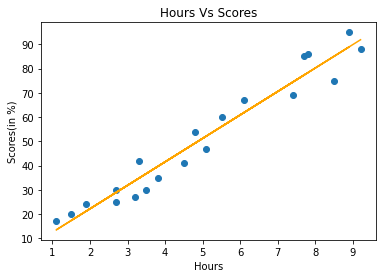

In [31]:
line = lr.coef_*x_train + lr.intercept_

# Equation of the Straight Line y= m*x + c

plt.scatter(x_train, y_train)
plt.plot(x_train,line, color='orange')
plt.title("Hours Vs Scores")
plt.xlabel('Hours')
plt.ylabel('Scores(in %)')
plt.show()

#### pREDICTING THE DATA FOR THE tESTING DATA SET

In [21]:
y_predited = lr.predict(x_test)

In [22]:
y_predited

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [25]:
pd.DataFrame({'Observed':y_test, 'Predicted':y_predited})

,Observed,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


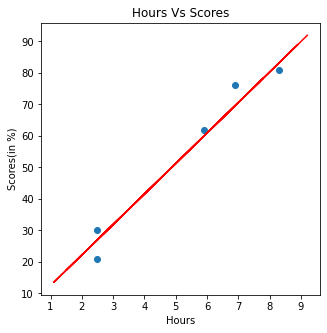

In [36]:
plt.figure(figsize=(5,5))
plt.scatter(x_test, y_test)
plt.plot(x_train,line, color='red')
plt.title("Hours Vs Scores")
plt.xlabel('Hours')
plt.ylabel('Scores(in %)')
plt.show()

### The Accuracy and quality of the Model

In [38]:
print("The Training score of the linear regression model is: ", lr.score(x_train, y_train))
print("The Testing score of the linear regression model is: ", lr.score(x_test, y_test))

The Training score of the linear regression model is:  0.9491209376364416
The Testing score of the linear regression model is:  0.9678055545167994


### Error Check

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("Mean Absolute error in the model: ", mean_absolute_error(y_test, y_predited))
print("Root Mean Squared error in the model: ", np.sqrt(mean_squared_error(y_test, y_predited)))

Mean Absolute error in the model:  3.9207511902099244
Root Mean Squared error in the model:  4.352380006653288


### Question:

#### Question: If a student studies for 9.25 hrs a day , what would be it's possible percentage in the result?

In [43]:
Hour = np.array([[9.25]])
Result = lr.predict(Hour)
print('If the student study for',Hour[0][0],' hours, then he may score upto',Result[0],'%')

If the student study for 9.25  hours, then he may score upto 92.38611528261494 %


### Thank You !!! 